In [32]:
import pandas as pd
import mysql.connector
from mysql.connector import errorcode
from PIL import Image
from matplotlib import pyplot as plt
from datetime import date
import plotly.express as px
import subprocess
import re

In [38]:
imagem = Image.open(r"C:\Users\adhr1\Desktop\Fotos PI\20240305_094036.jpg")

UnidentifiedImageError: cannot identify image file 'C:\\Users\\adhr1\\Desktop\\Fotos PI\\20240309_061901.heic'

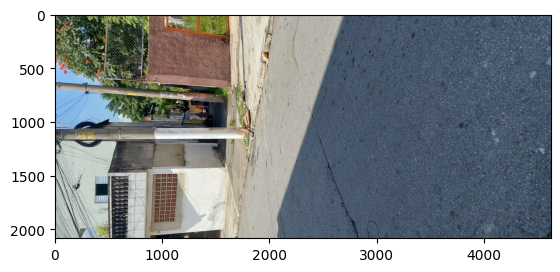

In [37]:
plt.imshow(imagem)

In [40]:
teste = subprocess.run([r'C:\Users\adhr1\Desktop\Fotos PI\exiftool', r'C:\Users\adhr1\Desktop\Fotos PI\20170408_230753.jpg'], shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, universal_newlines=True)
print(teste.stdout)

ExifTool Version Number         : 12.77
File Name                       : 20170408_230753.jpg
Directory                       : C:/Users/adhr1/Desktop/Fotos PI
File Size                       : 287 kB
File Modification Date/Time     : 2024:03:01 16:09:00-03:00
File Access Date/Time           : 2024:04:06 23:56:55-03:00
File Creation Date/Time         : 2024:03:01 16:09:00-03:00
File Permissions                : -rw-rw-rw-
File Type                       : JPEG
File Type Extension             : jpg
MIME Type                       : image/jpeg
JFIF Version                    : 1.01
Exif Byte Order                 : Little-endian (Intel, II)
Make                            : samsung
Camera Model Name               : SM-J200BT
Orientation                     : Rotate 180
X Resolution                    : 72
Y Resolution                    : 72
Resolution Unit                 : inches
Software                        : J200BTUBU2AQB2
Modify Date                     : 2017:04:08 23:07:53
Y Cb

In [6]:
teste2 = teste.stdout.split('\n')
keys = []
value = []
for var, linha in enumerate(teste2):
     linha = linha.split(':')
     try:
          keys.append(linha[0].strip())
          value.append(linha[1].strip())
     except:
          NotImplementedError

In [7]:
dicionario = {k: v for (k, v) in zip(keys, value)}

In [8]:
dicionario

{'ExifTool Version Number': '12.77',
 'File Name': '20170408_230753.jpg',
 'Directory': 'C',
 'File Size': '287 kB',
 'File Modification Date/Time': '2024',
 'File Access Date/Time': '2024',
 'File Creation Date/Time': '2024',
 'File Permissions': '-rw-rw-rw-',
 'File Type': 'JPEG',
 'File Type Extension': 'jpg',
 'MIME Type': 'image/jpeg',
 'JFIF Version': '1.01',
 'Exif Byte Order': 'Little-endian (Intel, II)',
 'Make': 'samsung',
 'Camera Model Name': 'SM-J200BT',
 'Orientation': 'Rotate 180',
 'X Resolution': '72',
 'Y Resolution': '72',
 'Resolution Unit': 'inches',
 'Software': 'J200BTUBU2AQB2',
 'Modify Date': '2017',
 'Y Cb Cr Positioning': 'Centered',
 'Exposure Time': '1/33',
 'F Number': '2.2',
 'Exposure Program': 'Program AE',
 'ISO': '50',
 'Exif Version': '0220',
 'Date/Time Original': '2017',
 'Create Date': '2017',
 'Exposure Compensation': '0',
 'Max Aperture Value': '2.2',
 'Metering Mode': 'Center-weighted average',
 'Light Source': 'Unknown',
 'Flash': 'No Flash',


In [9]:
print(dicionario['GPS Latitude'])
print(dicionario['GPS Longitude'])

22 deg 59' 54.00" S
43 deg 21' 24.00" W


In [22]:
def trata_coordenada(coordenadas: str) -> float:
    tratamento = re.sub("[., S, W']", ' ', coordenadas)
    tratamento = re.sub("deg", '.', tratamento)
    tratamento = re.sub(r'["]', '', tratamento)
    tratamento = re.sub(r' ', '', tratamento)
    return float(f'-{tratamento}')

In [29]:
config = {
  'user': 'sql10697244',
  'password': 'GacW1MBixH',
  'host': 'sql10.freesqldatabase.com',
  'database': 'sql10697244',
  'raise_on_warnings': True
}

cnx = mysql.connector.connect(**config)

cursor = cnx.cursor(buffered=True)

add_denuncia = ("INSERT INTO PI_DENUNCIA_LIXO "
               "(NOME_FOTO, ARMEZENAMENTO_FOTO, LATITUDE_FOTO, LONGETUDE_FOTO, DATA_FOTO, DATA_SITEMA) "
               "VALUES (%s, %s, %s, %s, %s, %s)")

In [12]:
data_sistema = f'{date.today()}'

In [13]:
nova_denuncia = (dicionario['File Name'], 
                 dicionario['Directory'], 
                 trata_coordenada(dicionario['GPS Latitude']), 
                 trata_coordenada(dicionario['GPS Longitude']), 
                 dicionario['Date/Time Original'], 
                 f'{date.today()}')

In [14]:
print(add_denuncia % nova_denuncia)

INSERT INTO PI_DENUNCIA_LIXO (NOME_FOTO, ARMEZENAMENTO_FOTO, LATITUDE_FOTO, LONGETUDE_FOTO, DATA_FOTO, DATA_SITEMA) VALUES (20170408_230753.jpg, C, -22.595400, -43.212400, 2017, 2024-04-06)


In [15]:
cursor.execute(add_denuncia, nova_denuncia)

In [16]:
querry = ("SELECT * FROM PI_DENUNCIA_LIXO")
cursor.execute(querry)

for (NOME_FOTO) in cursor:
    print(NOME_FOTO)

('20170408_230753.jpg', 'C', -22.5954, -43, '2017', datetime.date(2024, 4, 6))


In [23]:
coordenadas = [(trata_coordenada(dicionario['GPS Latitude']), trata_coordenada(dicionario['GPS Longitude'])) for var in range(0, 1)]

In [24]:
df1 = pd.DataFrame(coordenadas, columns=['lat', 'lng'])

In [25]:
df1

,lat,lng
0,-22.5954,-43.2124


In [20]:
fig = px.scatter_mapbox(df1, lat='lat', lon='lng', size_max=15, zoom=14,
                  mapbox_style="carto-positron")
fig.show()

In [30]:
delete_tabela = ("ALTER TABLE `PI_DENUNCIA_LIXO` CHANGE `DATA_FOTO` `DATA_FOTO` DATE NOT NULL;")
cursor.execute(delete_tabela)